In [1]:
import IJulia

# The julia kernel has built in support for Revise.jl, so this is the 
# recommended approach for long-running sessions:
# https://github.com/JuliaLang/IJulia.jl/blob/9b10fa9b879574bbf720f5285029e07758e50a5e/src/kernel.jl#L46-L51

# Users should enable revise within .julia/config/startup_ijulia.jl:
# https://timholy.github.io/Revise.jl/stable/config/#Using-Revise-automatically-within-Jupyter/IJulia-1

# clear console history
IJulia.clear_history()

fig_width = 5
fig_height = 4
fig_format = :png
fig_dpi = 96

# no retina format type, use svg for high quality type/marks
if fig_format == :retina
  fig_format = :svg
elseif fig_format == :pdf
  fig_dpi = 96
  # Enable PDF support for IJulia
  IJulia.register_mime(MIME("application/pdf"))
end

# convert inches to pixels
fig_width = fig_width * fig_dpi
fig_height = fig_height * fig_dpi

# Intialize Plots w/ default fig width/height
try
  import Plots

  # Plots.jl doesn't support PDF output for versions < 1.28.1
  # so use png (if the DPI remains the default of 300 then set to 96)
  if (Plots._current_plots_version < v"1.28.1") & (fig_format == :pdf)
    Plots.gr(size=(fig_width, fig_height), fmt = :png, dpi = fig_dpi)
  else
    Plots.gr(size=(fig_width, fig_height), fmt = fig_format, dpi = fig_dpi)
  end
catch e
  # @warn "Plots init" exception=(e, catch_backtrace())
end

# Initialize CairoMakie with default fig width/height
try
  import CairoMakie
  
  CairoMakie.activate!(type = string(fig_format))
  CairoMakie.update_theme!(resolution=(fig_width, fig_height))
catch e
    # @warn "CairoMakie init" exception=(e, catch_backtrace())
end
  
# Set run_path if specified
try
  run_path = raw"/run/media/alf/datos/misrepositorios/docencia/analisis-practicas-julia"
  if !isempty(run_path)
    cd(run_path)
  end
catch e
  @warn "Run path init:" exception=(e, catch_backtrace())
end


# emulate old Pkg.installed beahvior, see
# https://discourse.julialang.org/t/how-to-use-pkg-dependencies-instead-of-pkg-installed/36416/9
import Pkg
function isinstalled(pkg::String)
  any(x -> x.name == pkg && x.is_direct_dep, values(Pkg.dependencies()))
end

# ojs_define
if isinstalled("JSON") && isinstalled("DataFrames")
  import JSON, DataFrames
  global function ojs_define(; kwargs...)
    convert(x) = x
    convert(x::DataFrames.AbstractDataFrame) = Tables.rows(x)
    content = Dict("contents" => [Dict("name" => k, "value" => convert(v)) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
elseif isinstalled("JSON")
  import JSON
  global function ojs_define(; kwargs...)
    content = Dict("contents" => [Dict("name" => k, "value" => v) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
else
  global function ojs_define(; kwargs...)
    @warn "JSON package not available. Please install the JSON.jl package to use ojs_define."
  end
end


# don't return kernel dependencies (b/c Revise should take care of dependencies)
nothing


In [2]:
using SymPy  # Para el cálculo simbólico.
using Plots  # Para el dibujo de gráficas.
using Makie, GLMakie # Para el dibujo de gráficas en 3d.
using ImplicitPlots # Para el dibujo de gráficas de funciones implícitas.
using LaTeXStrings  # Para usar código LaTeX en los gráficos.
using LinearAlgebra # Para el módulo y el producto escalar de vectores.

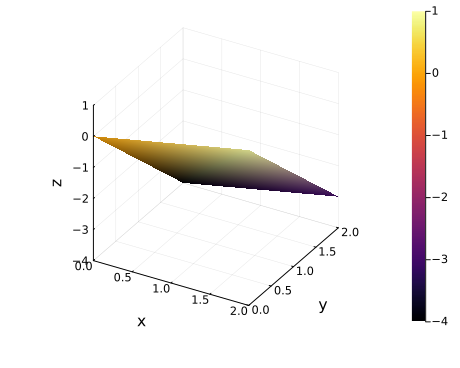

In [3]:
using Plots
f(x, y) = x/2 - 2y
xs = ys = range(0, 2, 2)
Plots.surface(xs, ys, f, xlab = "x", ylab = "y", zlab = "z")

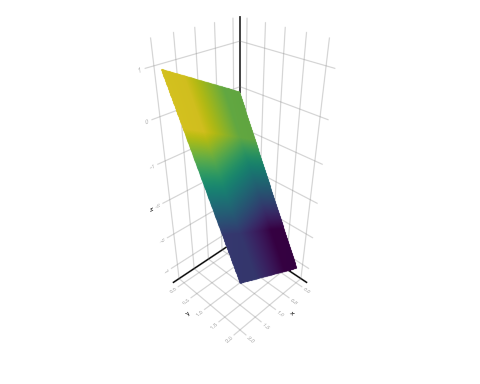

In [4]:
using GLMakie
f(x, y) = x/2 - 2y
xs = ys = range(0, 2, 2)
Makie.surface(xs, ys, f)

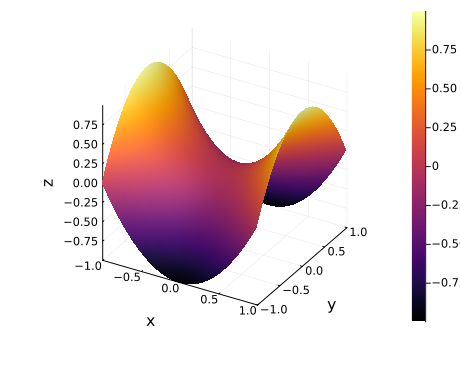

In [5]:
using Plots
g(x, y) = x^2-y^2
xs = ys = range(-1, 1, 30)
Plots.surface(xs, ys, g, xlab = "x", ylab = "y", zlab = "z")

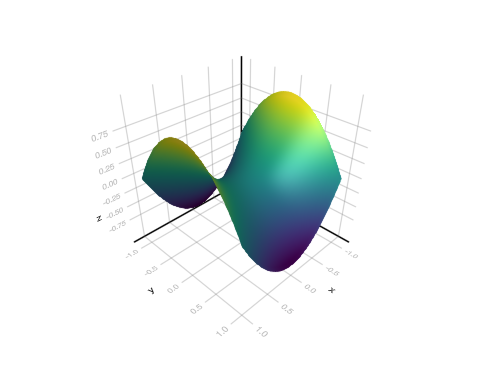

In [6]:
using GLMakie
g(x, y) = x^2 - y^2
xs = ys = range(-1, 1, 30)
Makie.surface(xs, ys, g)

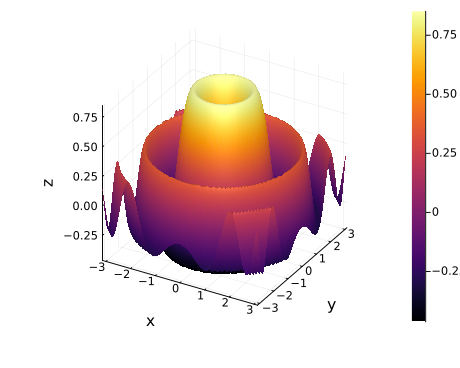

In [7]:
using Plots
h(x, y) = sin(x^2+y^2)/sqrt(x^2+y^2)
xs = ys = range(-pi, pi, 80)
Plots.surface(xs, ys, h, xlab = "x", ylab = "y", zlab = "z")

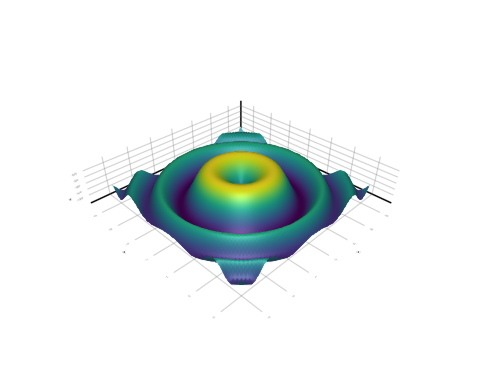

In [8]:
using GLMakie
h(x, y) = sin(x^2+y^2)/sqrt(x^2+y^2)
xs = ys = range(-pi, pi, 80)
Makie.surface(xs, ys, h)

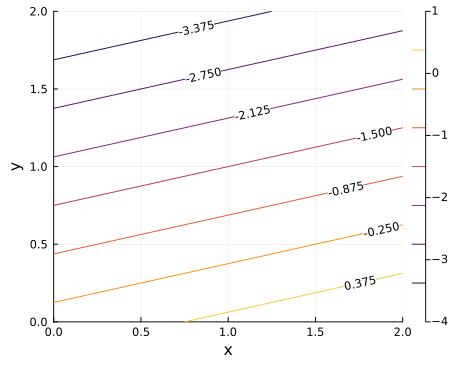

In [9]:
using Plots
f(x, y) = x/2 - 2y
xs = ys = range(0, 2, 50)
Plots.contour(xs, ys, f, levels = 7, xlab = "x", ylab = "y", clabels = true)

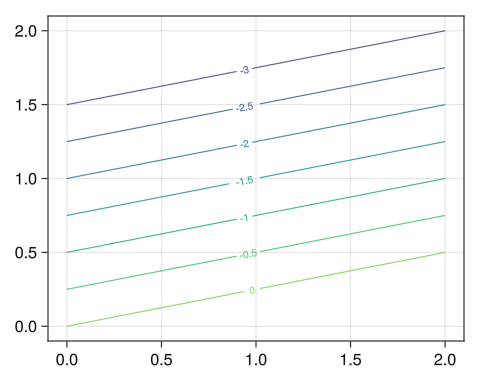

In [10]:
using GLMakie
f(x, y) = x/2 - 2y
xs = ys = range(0, 2, 50)
Makie.contour(xs, ys, f, labels = true,  levels = 0:-0.5:-3)

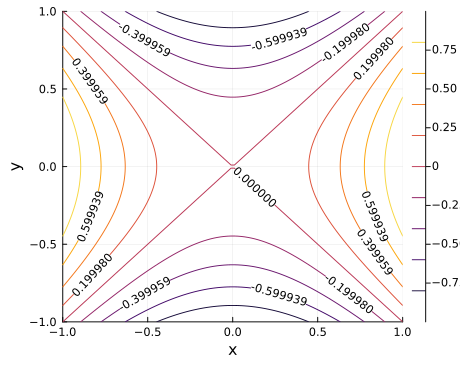

In [11]:
using Plots
g(x, y) = x^2 - y^2
xs = ys = range(-1, 1, 100)
Plots.contour(xs, ys, g, levels = 9, xlab = "x", ylab = "y", clabels = true)

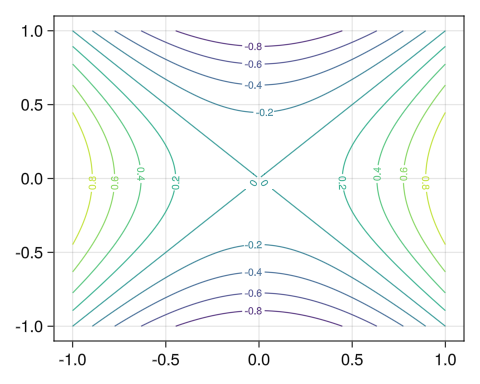

In [12]:
using GLMakie
f(x, y) = x^2 - y^2
xs = ys = range(-1, 1, 100)
Makie.contour(xs, ys, f, labels = true,  levels = -1:0.2:1)

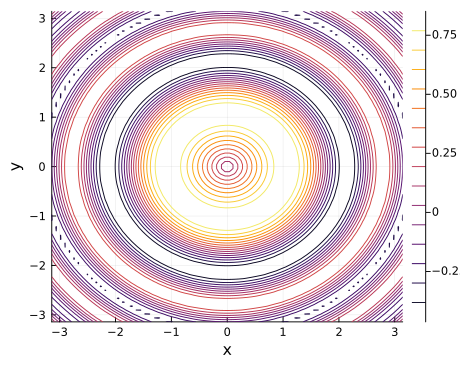

In [13]:
using Plots
h(x, y) = sin(x^2+y^2)/sqrt(x^2+y^2)
xs = ys = range(-pi, pi, 80)
Plots.contour(xs, ys, h, xlab = "x", ylab = "y")

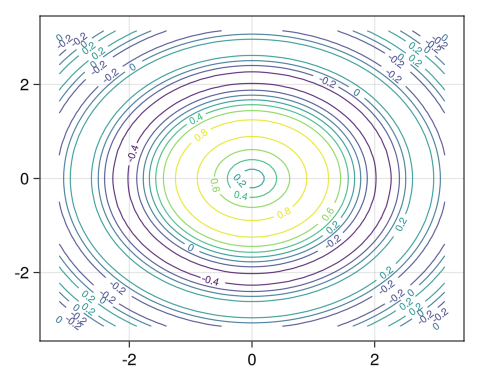

In [14]:
using GLMakie
h(x, y) = sin(x^2+y^2)/sqrt(x^2+y^2)
xs = ys = range(-pi, pi, 80)
Makie.contour(xs, ys, h, labels = true,  levels = -1:0.2:1)

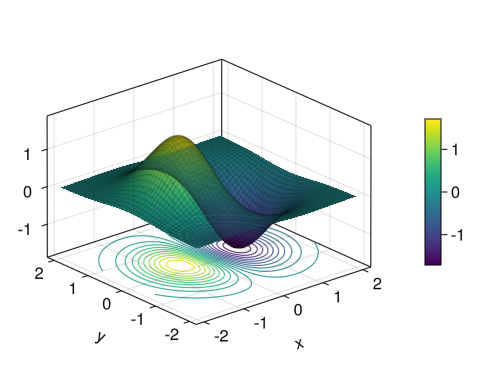

In [15]:
using GLMakie
f(x, y) = -4x*exp(-x^2-y^2)
xs = ys = range(-2, 2, 50)
zs = f.(xs, ys')
zmin = minimum(zs)
fig = Figure()
ax = Axis3(fig[1,1], )
surf = Makie.surface!(ax, xs, ys, zs, transparency = true)
Makie.wireframe!(ax, xs, ys, zs, color = (:black, 0.1), transparency = true)
Makie.contour!(ax, xs, ys, zs, levels = 20, transformation = (:xy, zmin), transparency=true)
Colorbar(fig[1, 2], surf, height = Relative(0.5))
fig

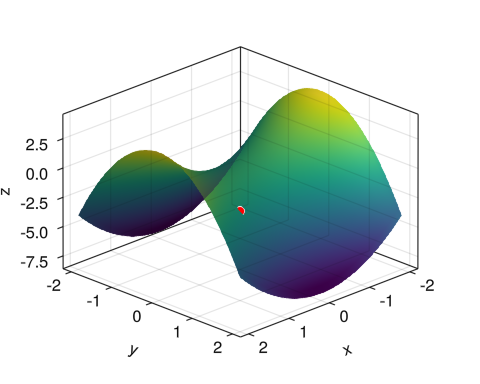

In [16]:
using GLMakie
f(x, y) = x^2 - 2y^2
xs = ys = range(-2, 2, 30)
fig = Figure()
ax = Axis3(fig[1,1], azimuth = pi/4)
Makie.surface!(ax, xs, ys, f, transparency = true)
Makie.scatter!(ax, Point3(1, 1, f(1,1)), color = :red)
fig

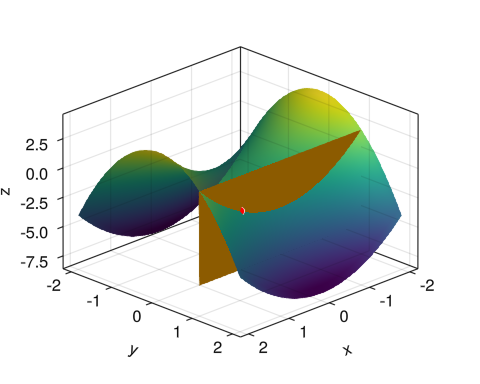

In [17]:
xs = [-2 -2; 2 2]
zs = [-6 2; -6 2]
ys = [1 1; 1 1]
Makie.surface!(ax, xs, ys, zs; colormap = [:orange])
fig

In [18]:
using SymPy
@syms x y
subs(diff(f(x,y), x), x => 1, y => 1)

2

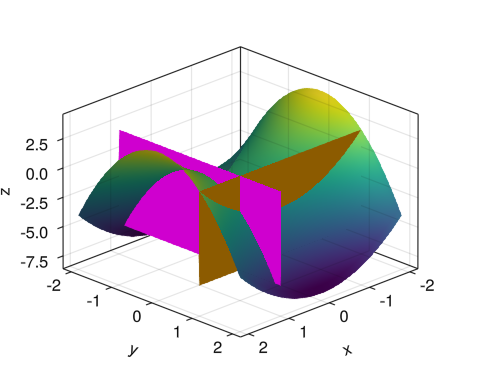

In [19]:
ys = [-2 -2; 2 2]
zs = [-6 2; -6 2]
xs = [1 1; 1 1]
Makie.surface!(ax, xs, ys, zs; colormap = [:magenta])
fig

In [20]:
using SymPy
@syms x y
subs(diff(f(x,y), y), x => 1, y => 1)

-4

In [21]:
using SymPy
@syms n R T V
diff(n*R*T/V, T)

R⋅n
───
 V 

In [22]:
diff(n*R*T/V, V)

-R⋅T⋅n 
───────
    2  
   V   

In [23]:
using SymPy
@syms x y
f(x, y) = exp(x+y)sin(x/y)
diff(f(x, y), x, y)

⎛       ⎛x⎞        ⎛x⎞               ⎛x⎞      ⎛x⎞⎞       
⎜  x⋅cos⎜─⎟   x⋅sin⎜─⎟            cos⎜─⎟   cos⎜─⎟⎟       
⎜       ⎝y⎠        ⎝y⎠      ⎛x⎞      ⎝y⎠      ⎝y⎠⎟  x + y
⎜- ──────── + ──────── + sin⎜─⎟ + ────── - ──────⎟⋅ℯ     
⎜      2          3         ⎝y⎠     y         2  ⎟       
⎝     y          y                           y   ⎠       

In [24]:
using SymPy
@syms x y
f(x, y) = exp(x+y)sin(x/y)
diff(f(x, y), y, x)

⎛       ⎛x⎞        ⎛x⎞               ⎛x⎞      ⎛x⎞⎞       
⎜  x⋅cos⎜─⎟   x⋅sin⎜─⎟            cos⎜─⎟   cos⎜─⎟⎟       
⎜       ⎝y⎠        ⎝y⎠      ⎛x⎞      ⎝y⎠      ⎝y⎠⎟  x + y
⎜- ──────── + ──────── + sin⎜─⎟ + ────── - ──────⎟⋅ℯ     
⎜      2          3         ⎝y⎠     y         2  ⎟       
⎝     y          y                           y   ⎠       

In [25]:
using SymPy, LinearAlgebra
@syms x y z
f(x, y, z) = exp(-x-2y-3z)
ex = diff.(f(x, y, z), [x, y, z])
∇f = lambdify(ex, (x, y, z))
println("Dirección de máximo decrecimiento : $(-∇f(1, 1, 1))")
println("Tasa de variación en esa dirección: $(-norm(∇f(1, 1, 1)))")

Dirección de máximo decrecimiento : [0.0024787521766663585, 0.004957504353332717, 0.0074362565299990755]
Tasa de variación en esa dirección: -0.009274641391805666


In [26]:
using SymPy, LinearAlgebra
@syms x y z
f(x, y, z) = exp(-x-2y-3z)
ex = [diff(f(x,y,z), i) for i in (x, y, z)]
∇f = lambdify(ex, (x, y, z))
println("Dirección de máximo decrecimiento : $(-∇f(1, 1, 1))")
println("Tasa de variación en esa dirección: $(-norm(∇f(1, 1, 1)))")

Dirección de máximo decrecimiento : [0.0024787521766663585, 0.004957504353332717, 0.0074362565299990755]
Tasa de variación en esa dirección: -0.009274641391805666


In [27]:
dot(∇f(1, 1, 1), normalize([2, -1, 3]))

-0.005962269466160785

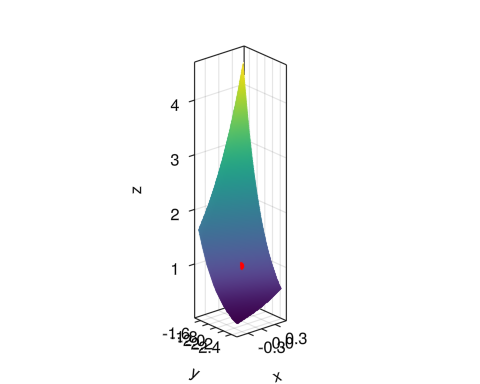

In [28]:
using SymPy, GLMakie
f(x, y, z) = x + 2y - log(z) + 4
@syms x y z
f1 = lambdify(solve(f(x,y,z), z)[1])
xs = range(-0.5, 0.5, 30)
ys = range(-2.5, -1.5, 30)
fig = Figure()
ax = Axis3(fig[1,1], aspect = :data)
Makie.surface!(ax, xs, ys, f1)
Makie.scatter!(ax, Point3(0, -2, 1), color = :red)
fig

In [29]:
using SymPy
ex = diff.(f(x, y, z), [x, y, z])
∇f = lambdify(ex, (x, y, z))
nl(t) = [0, -2, 1] + t*∇f(0, -2, 1) 
@syms t
println("Ecuación de la recta normal $(nl(t))")

Ecuación de la recta normal Sym[t, 2*t - 2, 1 - 1.0*t]


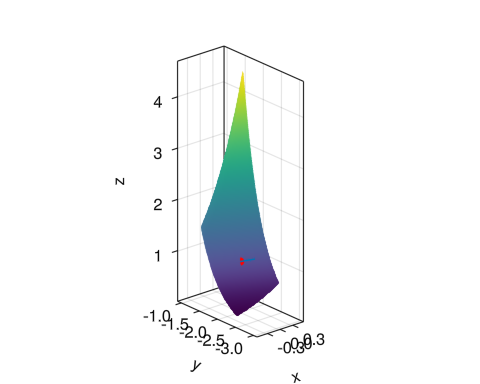

In [30]:
ts = range(-0.5, 0.5, 2)
points = Point3.(nl.(ts))
Makie.lines!(ax, points)
fig

In [31]:
using LinearAlgebra
tp(x,y) = solve(dot(([x, y, z] - [0, -2, 1]), ∇f(0, -2, 1)), z)[1]
println("Ecuación del plano tangente z = $(tp(x,y))")

Ecuación del plano tangente z = x + 2.0*y + 5.0


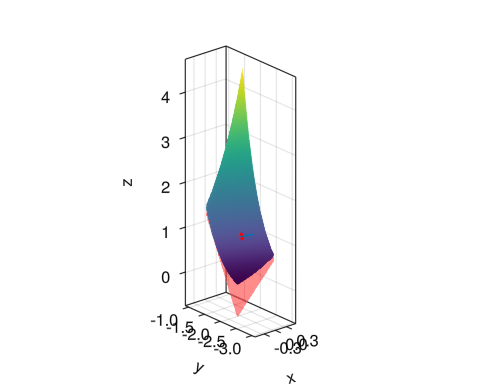

In [32]:
Makie.surface!(ax, xs, ys, tp, colormap = ["red"], alpha = 0.5, transparency = true)
fig

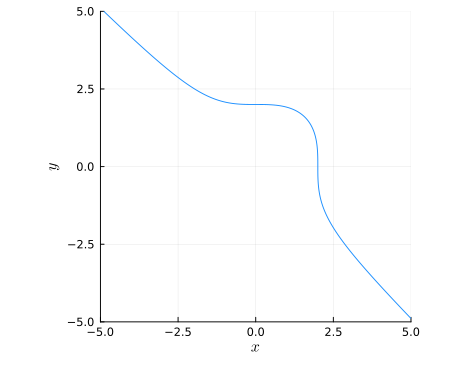

In [33]:
using Plots, ImplicitPlots, LaTeXStrings
f(x, y) = x^3 + y^3 - 8 
implicit_plot(f, xlab =  L"$x$", ylab = L"$y$", legend = false)

In [34]:
using SymPy
@syms x y u()
y′ = -diff(f(x, y), x) / diff(f(x, y), y)

  2 
-x  
────
  2 
 y  

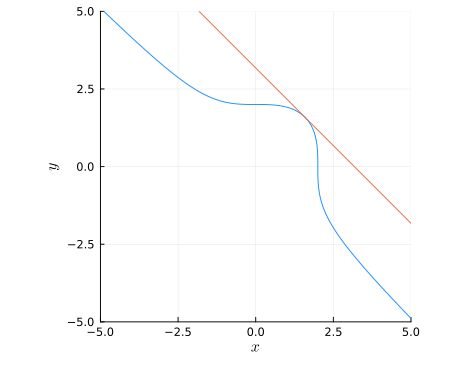

In [35]:
x₀ = y₀ = 2^(2/3)
tan = lambdify(y₀ + subs(y′, y => y₀, x => x₀)*(x-x₀))
Plots.plot!(tan)

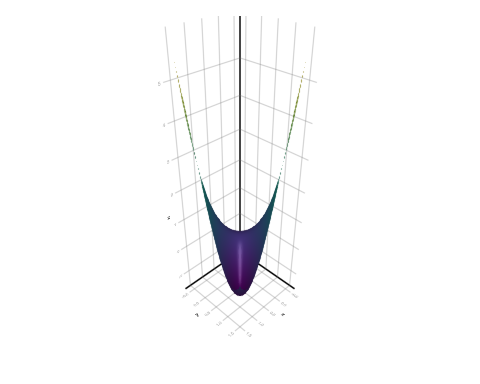

In [36]:
using GLMakie
f(x, y) = x^3+y^3-3x*y
xs = ys = range(-0.5, 1.5, 30)
Makie.surface(xs, ys, f)

In [37]:
using SymPy
@syms x y
nonlinsolve(diff.(f(x, y), (x, y)), (x, y))

⎧                ⎛  1   √3⋅ⅈ    1   √3⋅ⅈ⎞  ⎛  1   √3⋅ⅈ    1   √3⋅ⅈ⎞⎫
⎨(0, 0), (1, 1), ⎜- ─ - ────, - ─ + ────⎟, ⎜- ─ + ────, - ─ - ────⎟⎬
⎩                ⎝  2    2      2    2  ⎠  ⎝  2    2      2    2  ⎠⎭

In [38]:
using LinearAlgebra
hes = lambdify(det(hessian(f(x,y), (x,y))))

#123 (generic function with 1 method)

In [39]:
hes(0,0)

-9

In [40]:
hes(1,1)

27

In [41]:
fxx = lambdify(diff(f(x,y), x, x), (x,y))
fxx(1,1)

6

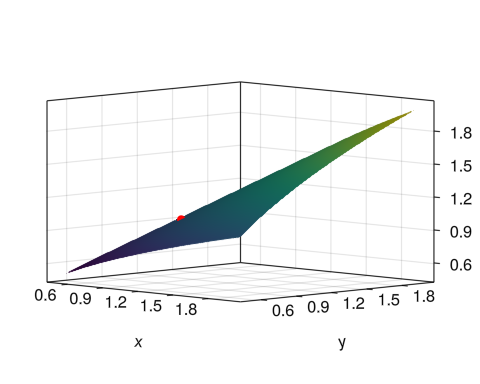

In [42]:
using GLMakie
f(x, y) = sqrt(x*y)
a = b = 1
xs = ys = range(0.5, 2, 30)
fig = Figure()
ax = Axis3(fig[1,1], azimuth = -pi/4, elevation = 0.1)
Makie.surface!(ax, xs, ys, f)
Makie.scatter!(ax, Point3(a, b, f(a,b)), color = :red)
fig

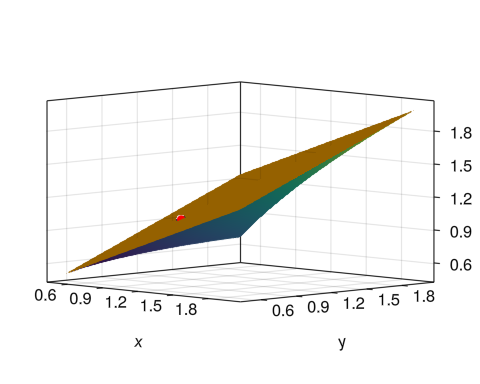

In [43]:
using SymPy, LinearAlgebra
@syms x, y
ex = diff.(f(x, y), [x, y])
∇f = lambdify(ex, (x, y))
p1(s,t) = f(a, b) + dot(∇f(a, b), [s-a, t-b])
Makie.surface!(ax, xs, ys, p1; colormap = [:orange], transparency = true)
fig

In [44]:
error = abs(f(1.01, 0.99) - p1(1.01, 0.99))

5.000125006249245e-5

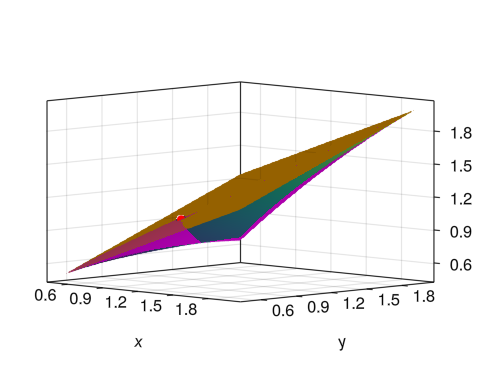

In [45]:
using SymPy, LinearAlgebra
@syms x, y
∇²f = lambdify(hessian(f(x,y), (x, y)), (x, y))
p2(s,t) = f(a, b) + dot(∇f(a, b), [s-a, t-b]) + 1/2 * dot(∇²f(a,b) * [s-a; t-b],  [s-a, t-b])
Makie.surface!(ax, xs, ys, p2; colormap = [:magenta], transparency = true)
fig

In [46]:
error = f(1.01, 0.99) - p2(1.01, 0.99) 

-1.2500624979594477e-9

In [47]:
#| echo: false
using QuizQuestions, SymPy
nothing

In [48]:
#| echo: false
d = Dict(L"$f(x,y) = \frac{\operatorname{sen}(2x^2+y^2)}{\sqrt{x^2+y^2}}$" => "A", L"$g(x,y) = \frac{\cos(xy)}{\sqrt{x^2+1}}$" => "B", L"$h(x,y) = \cos(x)-\operatorname{sen}(2y)$" => "C", L"$i(x,y) = \frac{1}{2}(\operatorname{sen}(x^2)-\cos(y^2))$" => "D")
matchq(d, label="Empareja la función con su gráfica.")

QuizQuestions.Matchq(LaTeXString[L"$f(x,y) = \frac{\operatorname{sen}(2x^2+y^2)}{\sqrt{x^2+y^2}}$", L"$h(x,y) = \cos(x)-\operatorname{sen}(2y)$", L"$i(x,y) = \frac{1}{2}(\operatorname{sen}(x^2)-\cos(y^2))$", L"$g(x,y) = \frac{\cos(xy)}{\sqrt{x^2+1}}$"], ["A", "B", "C", "D"], [1, 3, 4, 2], "Empareja la función con su gráfica.", "", "")

In [49]:
#| echo: false
using SymPy
@syms x, y, z::real
f(x,y,z) = log(sqrt(cos(x^2*y)))/z^2
sol = N(subs(diff(f(x,y,z), x, z, y), x=>2, y=>pi, z=>1))
numericq(sol, 1e-5, hint="Introducir hasta 5 decimales")

QuizQuestions.Numericq(50.26548245743669181540229413247204614715471039000169313559911347692506250057917, 1.0e-5, "", "", "Introducir hasta 5 decimales", "", nothing)

In [50]:
#| echo: false
using SymPy
@syms x, y, z::real
f(x,y,z) = x/3 * (y*z)^(2/3)
ex = diff.(f(x, y, z), [x, y, z])
∇f = lambdify(ex, (x, y, z))
sol = ∇f(40, 0.4, 0.5)
fillblankq("Dirección de cambio de la temperatura: ____" , sol[1])

QuizQuestions.FillBlankNumericQ("Dirección de cambio de la temperatura: ____", 0.11399839644511314, 0, "", "", "", nothing)

In [51]:
#| echo: false
fillblankq("Dirección de cambio del acetato de etilo: ____" , sol[2])

QuizQuestions.FillBlankNumericQ("Dirección de cambio del acetato de etilo: ____", 7.599893096340876, 0, "", "", "", nothing)

In [52]:
#| echo: false
fillblankq("Dirección de cambio del hidróxido de sodio: ____" , sol[3])

QuizQuestions.FillBlankNumericQ("Dirección de cambio del hidróxido de sodio: ____", 6.079914477072702, 0, "", "", "", nothing)

In [53]:
#| echo: false
using LinearAlgebra
sol = dot(∇f(40, 0.4, 0.5), normalize([-1/2, 1/2, 1]))
numericq(sol, 1e-5, hint="Introducir hasta 5 decimales")

QuizQuestions.Numericq(8.020333096687784, 1.0e-5, "", "", "Introducir hasta 5 decimales", "", nothing)

In [54]:
#| echo: false  
using SymPy, LinearAlgebra
@syms x, y, z::real
f(x,y,z) = exp(z*cos(x*y))/(x*z)-1/ℯ
fx = diff.(f(x,y,z), x)
fy = diff.(f(x,y,z), y)
fz = diff.(f(x,y,z), z)
- subs(fx, x=>1, y=>pi, z=>1) / subs(fz, x=>1, y=>pi, z=>1)
choices = (L"La variable $z$ aumenta $1/e$ unidades por cada unidad que aumente $x$, si $y$ se mantiene constante.", L"La variable $z$ aumenta la mitad de lo que aumenta $x$, si $y$ se mantiene constante.", L"La variable $z$ disminuye lo mismo que aumenta $y$, si $x$ se mantiene constante.", L"La variable $z$ se mantiene constante cuando se incrementa $x$, si $y$ se mantiene constante.", "Las otras opciones son falsas.")
answer = 2
radioq(choices, answer)

QuizQuestions.Radioq(("Las otras opciones son falsas.", L"La variable $z$ disminuye lo mismo que aumenta $y$, si $x$ se mantiene constante.", L"La variable $z$ aumenta la mitad de lo que aumenta $x$, si $y$ se mantiene constante.", L"La variable $z$ aumenta $1/e$ unidades por cada unidad que aumente $x$, si $y$ se mantiene constante.", L"La variable $z$ se mantiene constante cuando se incrementa $x$, si $y$ se mantiene constante."), 3, [1, 2, 3, 4, 5], ("Las otras opciones son falsas.", L"La variable $z$ disminuye lo mismo que aumenta $y$, si $x$ se mantiene constante.", L"La variable $z$ aumenta la mitad de lo que aumenta $x$, si $y$ se mantiene constante.", L"La variable $z$ aumenta $1/e$ unidades por cada unidad que aumente $x$, si $y$ se mantiene constante.", L"La variable $z$ se mantiene constante cuando se incrementa $x$, si $y$ se mantiene constante."), "", "", "", false)

In [55]:
#| echo: false        
ex = diff.(f(x, y, z), [x, y, z])
∇f = lambdify(ex, (x, y, z))
tp(x,y) = solve(dot(([x, y, z] - [1, PI, 1]), ∇f(1, PI, 1)), z)[1]
choices = (L"$z=1-x+\frac{y}{\pi}$", L"$z=\frac{3-x}{2}$", L"$z=(\pi+1)x-y$", L"$z=x+y-(\pi+2)$", "Las otras opciones son falsas.")
answer = 2
radioq(choices, answer)

QuizQuestions.Radioq((L"$z=\frac{3-x}{2}$", "Las otras opciones son falsas.", L"$z=x+y-(\pi+2)$", L"$z=1-x+\frac{y}{\pi}$", L"$z=(\pi+1)x-y$"), 1, [1, 2, 3, 4, 5], (L"$z=\frac{3-x}{2}$", "Las otras opciones son falsas.", L"$z=x+y-(\pi+2)$", L"$z=1-x+\frac{y}{\pi}$", L"$z=(\pi+1)x-y$"), "", "", "", false)

In [56]:
#| echo: false     
using SymPy, LinearAlgebra
@syms x, y::real
f(x,y) = -y/(9+x^2+y^2)
nonlinsolve(diff.(f(x, y), (x, y)), (x, y))
choices = (L"Tiene un máximo relativo en el punto $(3,-3)$.", L"Tiene un máximo relativo en el punto $(0,3)$ y un mínimo relativo en el punto $(0,-3)$.", L"Tiene un máximo relativo en el punto $(0,-3)$ y un punto de silla en el punto $(0,3)$.", "No tiene extremos relativos.", L"Tiene un máximo relativo en el punto $(0,-3)$ y un mínimo relativo en el punto $(0,3)$.")
answer = 5
radioq(choices, answer)

QuizQuestions.Radioq((L"Tiene un máximo relativo en el punto $(0,-3)$ y un punto de silla en el punto $(0,3)$.", L"Tiene un máximo relativo en el punto $(0,-3)$ y un mínimo relativo en el punto $(0,3)$.", L"Tiene un máximo relativo en el punto $(0,3)$ y un mínimo relativo en el punto $(0,-3)$.", L"Tiene un máximo relativo en el punto $(3,-3)$.", "No tiene extremos relativos."), 2, [1, 2, 3, 4, 5], (L"Tiene un máximo relativo en el punto $(0,-3)$ y un punto de silla en el punto $(0,3)$.", L"Tiene un máximo relativo en el punto $(0,-3)$ y un mínimo relativo en el punto $(0,3)$.", L"Tiene un máximo relativo en el punto $(0,3)$ y un mínimo relativo en el punto $(0,-3)$.", L"Tiene un máximo relativo en el punto $(3,-3)$.", "No tiene extremos relativos."), "", "", "", false)

In [57]:
#| echo: false  
sol = 0.99749394
numericq(sol, 1e-8, hint="Introducir hasta 8 decimales")

QuizQuestions.Numericq(0.99749394, 1.0e-8, "", "", "Introducir hasta 8 decimales", "", nothing)